## Fantasy Football Analysis - Exploratory Data Analysis (EDA)
### This structured process ensures **clean, insightful, and predictive analysis** of fantasy football player performance.

### ESPN Fantasy Football API
- Extracts fantasy football scoring data for the **2022, 2023, and 2024** NFL seasons.
- API pull and data formatting are handled in **`weekly_ff_espn_api_call.py`**, which saves data as CSV files.

### Loading & Inspecting Data
- **Check dataset structure**: Shape, data types, and basic statistics.
- **Handle missing values**: Identify and clean incomplete data.
- **Detect duplicate records**: Ensure data integrity.

### Visualizing Feature Distributions
- **Histograms**: Examine the distribution of key statistics.
- **Boxplots**: Identify potential outliers.

### Identifying Feature Correlations
- **Heatmap visualization**: Analyze relationships between numerical features.

### Performance Analysis by Position
- **Compare fantasy points by position** before feature engineering.

### Tracking Weekly Trends
- **Line charts**: Analyze weekly fantasy points over time.

### Saving Cleaned Data for Further Analysis
- **Metric engineering** in **`feature_engineering.ipynb`** augments data with impactful features.
- **Neural Network models** in **`NN_Model.ipynb`** predict **weekly fantasy football performance**.
- **GMM clustering** in **`GMM_draft_tiers.ipynb`** assigns **optimal draft tiers** for fantasy football players.

---

### Data Dictionary

| **Column Name**         | **Definition** |
|----------------------|----------------------------|
| **`season`**        | The year of the NFL season. |
| **`week`**          | The specific week of the NFL season. |
| **`player_id`**     | Unique identifier for each player. |
| **`player_name`**   | The name of the player. |
| **`team`**          | The team the player is currently playing for. |
| **`position`**      | The position the player plays (e.g., QB, RB, WR, TE). |
| **`fantasy_points`** | The number of fantasy points scored by the player in a given week. |
| **`projected_points`** | The number of fantasy points the player was projected to score in a given week. |

---

In [4]:
#############################################
### Import Libraries
#############################################

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

## set viz style
sns.set(style="whitegrid")

## set pandas display options
pd.set_option('display.max_rows', None)          ## remove row display limit
pd.set_option('display.max_columns', None)       ## remove column display limit
pd.set_option('display.max_colwidth', None)      ## ensure full dataframe content is shown
pd.set_option('display.width', 0)                ## prevent truncated dataframe output

In [5]:
#############################################
### Extract ESPN API Data
#############################################

## run script to extract, format, and save data from ESPN API to file fantasy_weekly_stats_combined.csv
%run weekly_ff_espn_api_call.py

ESPN_S2: AEBRL2...
SWID: {FE4EC...
Fetching data for SEASON 2022...
Fetching data for Week 1 in 2022...
Fetching data for Week 2 in 2022...
Fetching data for Week 3 in 2022...
Fetching data for Week 4 in 2022...
Fetching data for Week 5 in 2022...
Fetching data for Week 6 in 2022...
Fetching data for Week 7 in 2022...
Fetching data for Week 8 in 2022...
Fetching data for Week 9 in 2022...
Fetching data for Week 10 in 2022...
Fetching data for Week 11 in 2022...
Fetching data for Week 12 in 2022...
Fetching data for Week 13 in 2022...
Fetching data for Week 14 in 2022...
Fetching data for Week 15 in 2022...
Fetching data for Week 16 in 2022...
Fetching data for Week 17 in 2022...
Unique Positions After Removing K and DEF (2022): ['RB' 'WR' 'QB' 'TE']
Data Sample for 2022:
    season  week  player_id       player_name team position  fantasy_points  \
0    2022     1    3068267     Austin Ekeler  LAC       RB            11.2   
1    2022     1    4361579  Javonte Williams  DEN       RB   

In [6]:
#############################################
### Load & Preview Data
#############################################

## load weekly NFL fantasy football stats data as dataframe
df = pd.read_csv("./data/fantasy_weekly_stats_combined.csv")

## preview data
print("\nFirst 5 Rows:\n", df.head())
print("\nDataset Shape:", df.shape)
print("\nColumn Info:")
df.info()
print("\nSummary Statistics:\n", df.describe())

## check missing values
missing_values = df.isnull().sum()
print("\nMissing Values per Column:\n", missing_values)

## check for duplicates
duplicates = df.duplicated().sum()
print("\nNumber of Duplicates:", duplicates)


First 5 Rows:
    season  week  player_id       player_name team position  fantasy_points  \
0    2022     1    3068267     Austin Ekeler  LAC       RB            11.2   
1    2022     1    4361579  Javonte Williams  DEN       RB            19.8   
2    2022     1    3915416          DJ Moore  CHI       WR             8.0   
3    2022     1    4239993       Tee Higgins  CIN       WR             4.7   
4    2022     1    3932905   Diontae Johnson  PIT       WR            12.5   

   projected_points  
0             19.63  
1             15.27  
2             14.48  
3             14.62  
4             14.69  

Dataset Shape: (8525, 8)

Column Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8525 entries, 0 to 8524
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   season            8525 non-null   int64  
 1   week              8525 non-null   int64  
 2   player_id         8525 non-null   int64  
 3

In [7]:
#############################################
### Clean & Save Data by Season
#############################################

## sort by player_id and week to ensure correct chronological order
df = df.sort_values(by=['player_id', 'week'])

## fill missing values to avoid NaN-related issues
df.fillna({"team": "FA"}, inplace=True)
df.fillna(0, inplace=True)

## remove duplicates if any exist
df = df.drop_duplicates()

## unique seasons
seasons = [2022, 2023, 2024]

## save cleaned CSV for each season 
data_dir = "data"
for season in seasons:
    season_df = df[df["season"] == season] 
    filename = os.path.join(data_dir, f"fantasy_weekly_stats_{season}_cleaned.csv")
    season_df.to_csv(filename, index=False)
    print(f"Saved: {filename} ({season_df.shape[0]} rows)")

Saved: data/fantasy_weekly_stats_2022_cleaned.csv (2825 rows)
Saved: data/fantasy_weekly_stats_2023_cleaned.csv (2829 rows)
Saved: data/fantasy_weekly_stats_2024_cleaned.csv (2871 rows)



Position-Based Fantasy Points Summary:
                mean  median       std  count
position                                    
QB        15.252439   15.94  9.654968   1058
WR        10.104165    8.80  9.019517   3481
RB         9.692246    8.40  8.583521   2889
TE         8.461203    7.30  7.484699   1097 




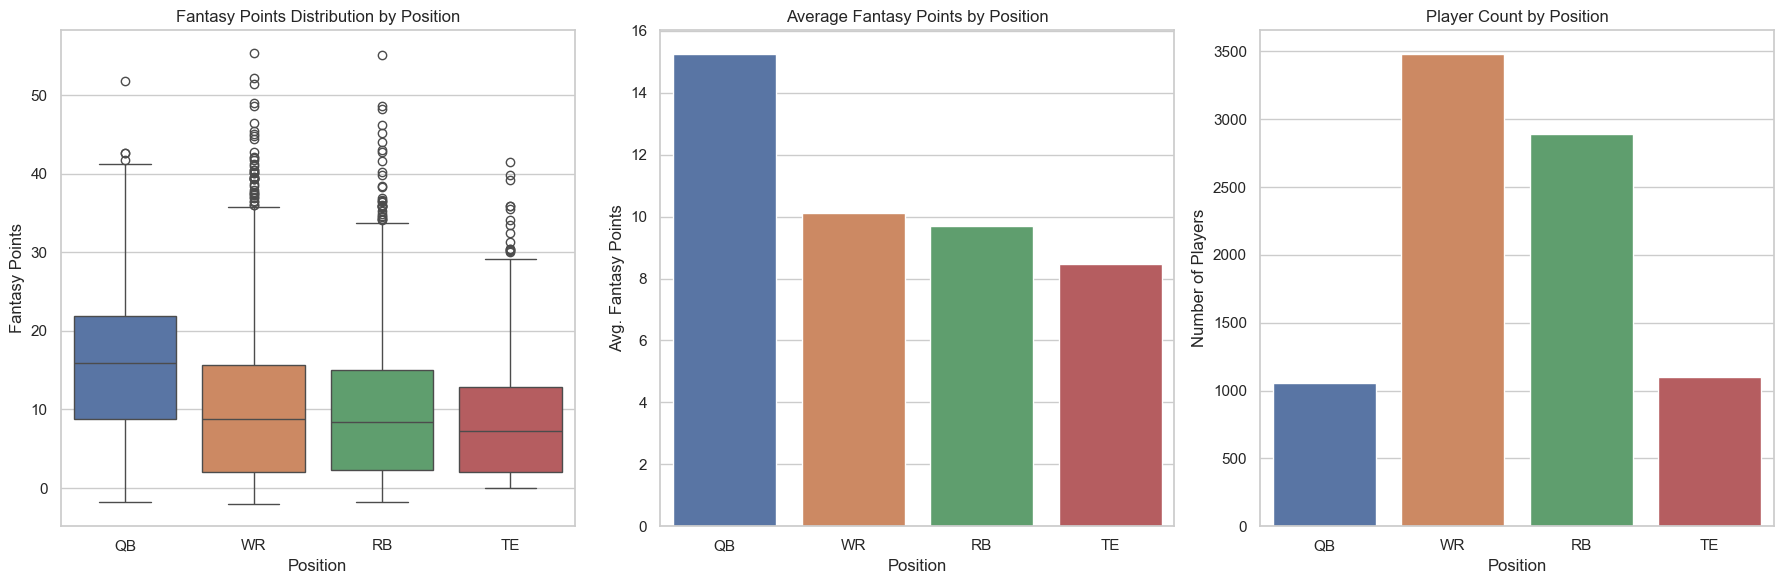

In [8]:
#############################################
### Position-Based Analysis 
#############################################

## subset data to capture summary stats by position
position_summary = df.groupby("position")["fantasy_points"].agg(["mean", "median", "std", "count"]).sort_values(by="mean", ascending=False)
print("\nPosition-Based Fantasy Points Summary:\n", position_summary, "\n\n")

## set subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

## box plot of FP distribution by position
sns.boxplot(x="position", y="fantasy_points", data=df, ax=axes[0], hue="position", legend=False)
axes[0].set_xlabel("Position")
axes[0].set_ylabel("Fantasy Points")
axes[0].set_title("Fantasy Points Distribution by Position")

## bar plot of average FP by position
sns.barplot(x=position_summary.index, y=position_summary["mean"], ax=axes[1], hue=position_summary.index, legend=False)
axes[1].set_xlabel("Position")
axes[1].set_ylabel("Avg. Fantasy Points")
axes[1].set_title("Average Fantasy Points by Position")

## bar plot of player frequency by position
sns.barplot(x=position_summary.index, y=position_summary["count"], ax=axes[2], hue=position_summary.index, legend=False)
axes[2].set_xlabel("Position")
axes[2].set_ylabel("Number of Players")
axes[2].set_title("Player Count by Position")

## adjust layout for readability
plt.tight_layout()
plt.show()

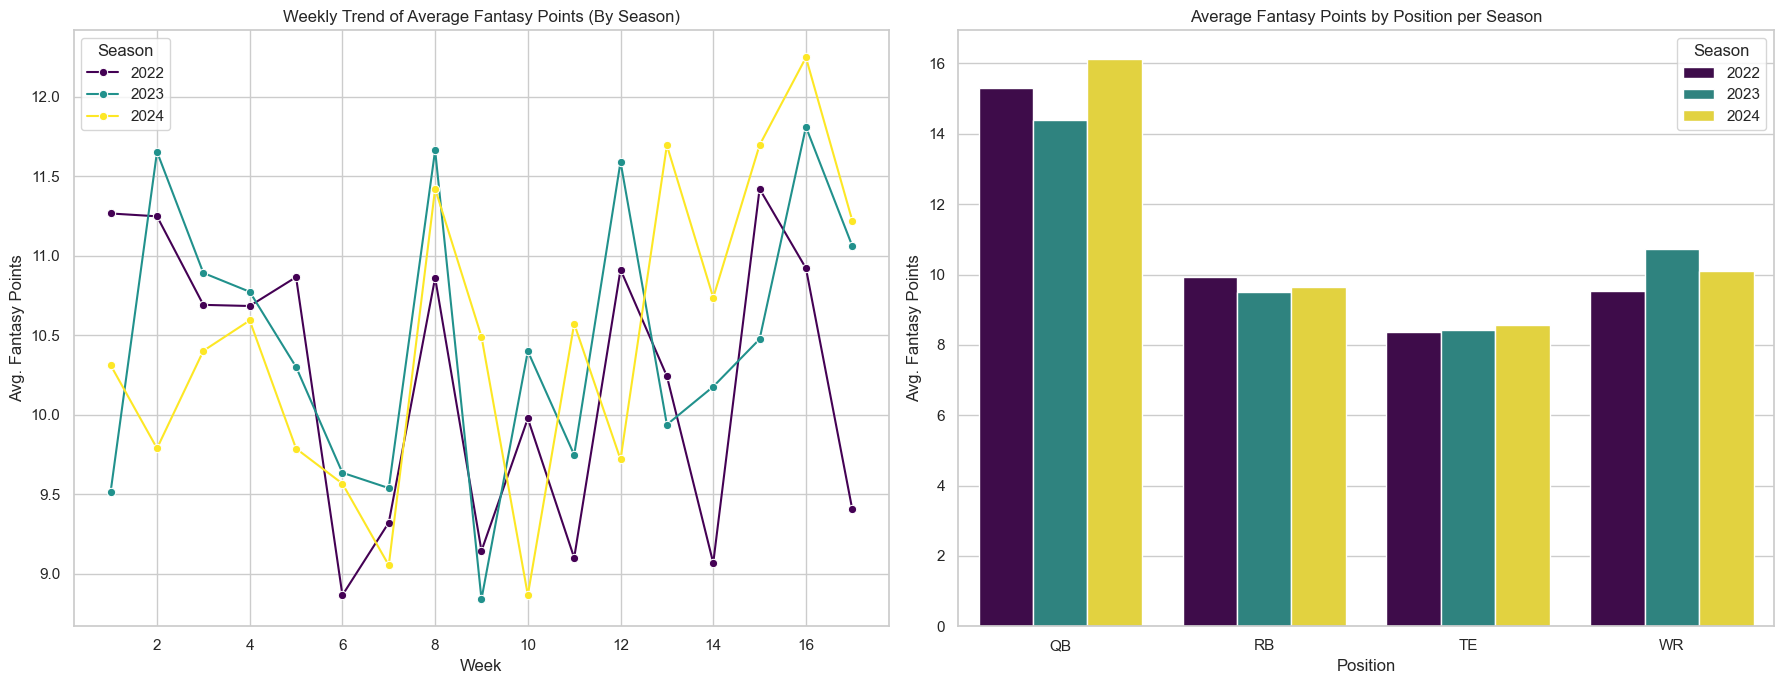

In [9]:
#############################################
### Weekly & Seasonal Trends
#############################################

## subset data to capture weekly trends for each season
weekly_trend_season = df.groupby(["season", "week"])["fantasy_points"].mean().reset_index()

## average FP by position & season
position_season_avg = df.groupby(["season", "position"])["fantasy_points"].mean().reset_index()

## set subplots
fig, axes = plt.subplots(1, 2, figsize=(18, 7))

## line plot of weekly FP trends (2022, 2023, 2024)
sns.lineplot(data=weekly_trend_season, x="week", y="fantasy_points", hue="season", marker="o", ax=axes[0], palette="viridis")
axes[0].set_xlabel("Week")
axes[0].set_ylabel("Avg. Fantasy Points")
axes[0].set_title("Weekly Trend of Average Fantasy Points (By Season)")
axes[0].legend(title="Season")

## bar plot of seasonal FP by position
sns.barplot(data=position_season_avg, x="position", y="fantasy_points", hue="season", ax=axes[1], palette="viridis")
axes[1].set_xlabel("Position")
axes[1].set_ylabel("Avg. Fantasy Points")
axes[1].set_title("Average Fantasy Points by Position per Season")
axes[1].legend(title="Season")

## adjust layout for readability
plt.tight_layout()
plt.show()

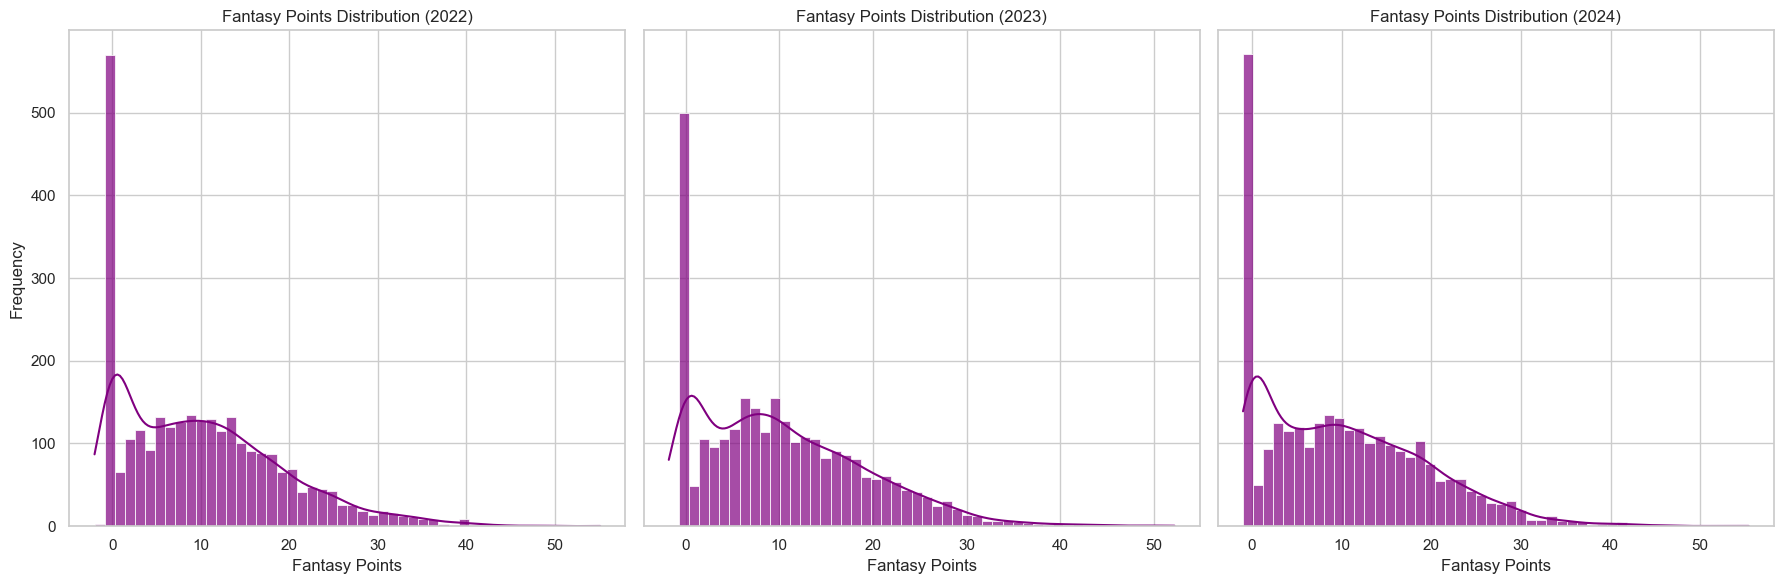

In [10]:
#############################################
### Seasonal FP Distribution Histograms
#############################################

## unique seasons
seasons = [2022, 2023, 2024]

## set subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

## plot histogram for each season
for i, season in enumerate(seasons):
    season_df = df[df["season"] == season]
    sns.histplot(season_df["fantasy_points"], bins=50, kde=True, color="purple", alpha=0.7, ax=axes[i])
    axes[i].set_xlabel("Fantasy Points")
    axes[i].set_ylabel("Frequency" if i == 0 else "")  ## ylabel first subplot only
    axes[i].set_title(f"Fantasy Points Distribution ({season})")
    axes[i].grid(True)

plt.tight_layout()
plt.show()

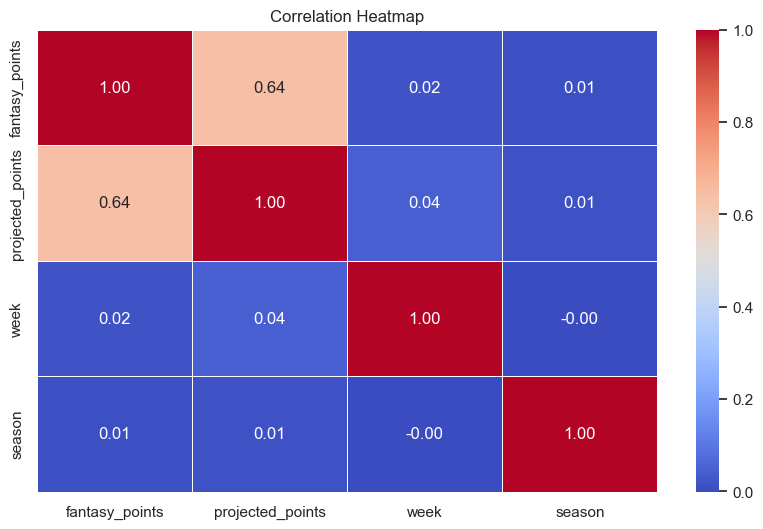

In [11]:
#############################################
### Correlation Analysis
#############################################

## heatmap of feature correlations
numeric_columns = ["fantasy_points", "projected_points", "week", "season"]
plt.figure(figsize=(10, 6))
sns.heatmap(df[numeric_columns].corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

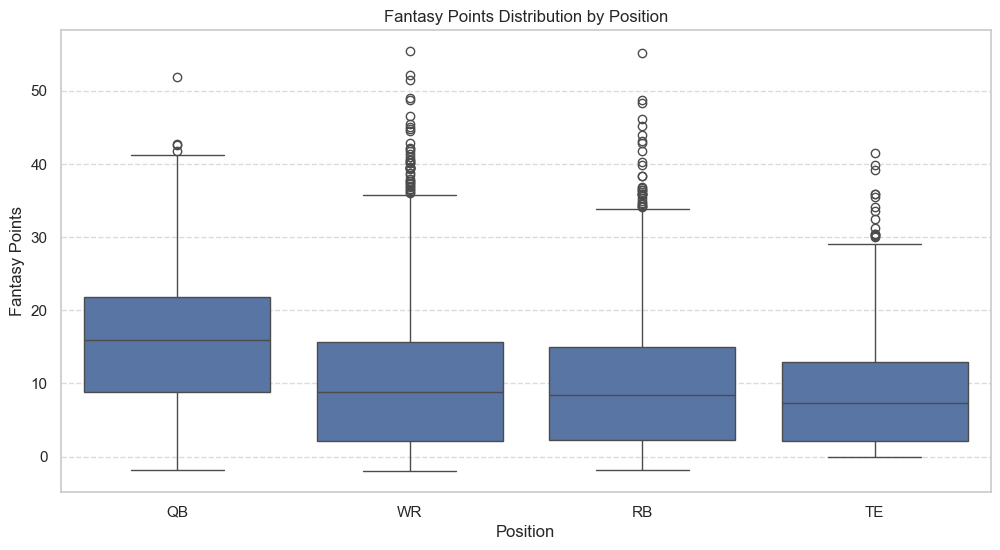


Count of Outliers by Season:
 season
2022    31
2023    27
2024    27
Name: count, dtype: int64

Count of Outliers by Position:
 position
WR    40
RB    21
QB    19
TE     5
Name: count, dtype: int64


In [12]:
#############################################
### Outliers by Position - Boxplots
#############################################

plt.figure(figsize=(12, 6))
sns.boxplot(x="position", y="fantasy_points", data=df)
plt.title("Fantasy Points Distribution by Position")
plt.xlabel("Position")
plt.ylabel("Fantasy Points")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

## identify potential outliers - top 1% scoring players
outlier_threshold = df["fantasy_points"].quantile(0.99)
outliers = df[df["fantasy_points"] > outlier_threshold]

## outlier frequency by season
outliers_by_season = outliers["season"].value_counts().sort_index()
print("\nCount of Outliers by Season:\n", outliers_by_season)

## outlier frequency by position
outliers_by_position = outliers["position"].value_counts().sort_values(ascending=False)
print("\nCount of Outliers by Position:\n", outliers_by_position)